## Iris DataSet 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

import warnings
warnings.filterwarnings('ignore')


In [98]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')


In [99]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### First We will have a overall look of the DataSet

In [100]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])
print()

print('Features')
print()
print( df.columns.tolist())
print()

print(' Unique Values')
print()
print( df.nunique())

Rows: 150
Columns: 5

Features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

 Unique Values

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64


In [101]:
df.species.unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)


  ### Checking if there is any inconsistency in the DataSet. <br />As we see there is no null values in the DateSet, so the Data can be Processed

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Seperating the Individual Species to Plot them against each other in Univariate

In [103]:
df_setosa = df.loc[df['species']=='setosa']
df_virginica = df.loc[df['species'] == 'virginica']
df_versicolor = df.loc[df['species'] == 'versicolor']

# **Expolatory Data Analysis**

### Seeing how many examples we have of each Species

(<AxesSubplot:xlabel='species', ylabel='Count'>,
 setosa        50
 versicolor    50
 virginica     50
 Name: species, dtype: int64)

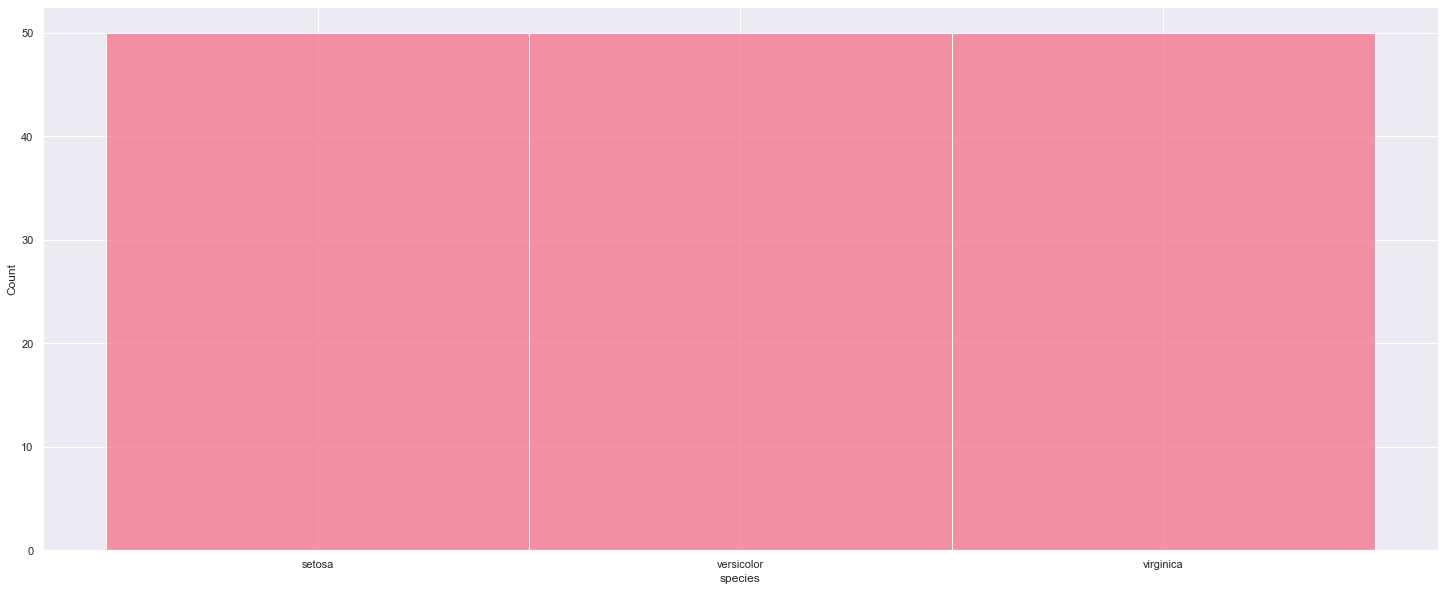

In [104]:
sns.histplot(x='species',data=df), df['species'].value_counts()

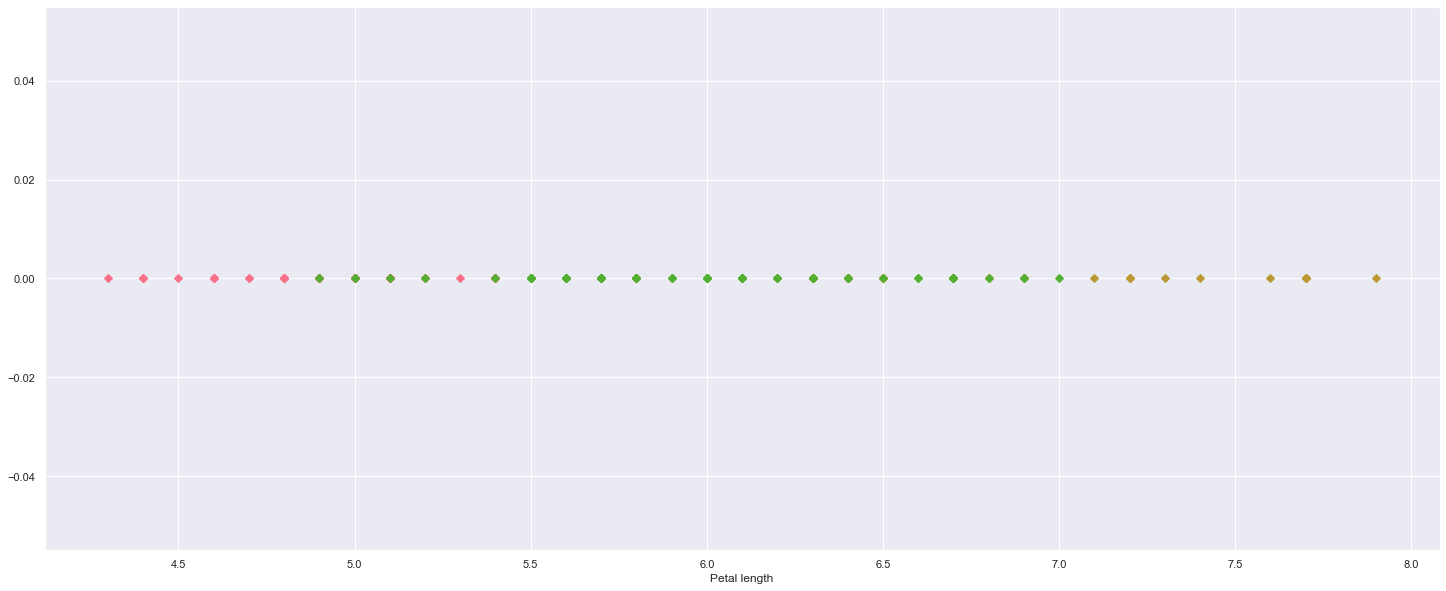

In [105]:
plt.plot(df_setosa['sepal_length'], np.zeros_like(df_setosa['sepal_length']), 'D')
plt.plot(df_virginica['sepal_length'], np.zeros_like(df_virginica['sepal_length']), 'D')
plt.plot(df_versicolor['sepal_length'], np.zeros_like(df_versicolor['sepal_length']), 'D')
plt.xlabel('Petal length')

plt.show()


## Bivariate Analysis

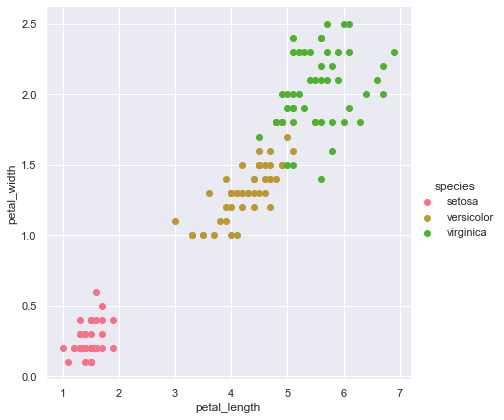

In [106]:
sns.FacetGrid(hue='species',data=df, size=6).map(plt.scatter, 'petal_length', 'petal_width').add_legend()
plt.show()

### Having a look at Individual Feature in SeaBorn through BoxPlot

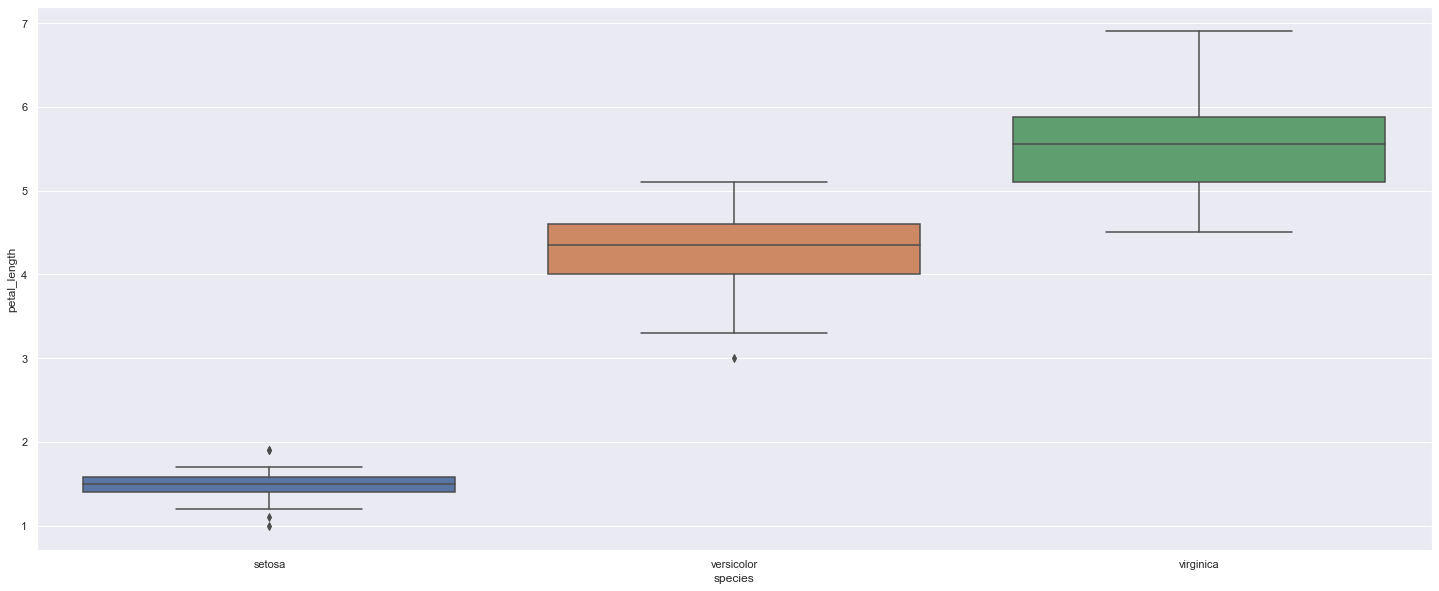

In [125]:
sns.boxplot(x='species', y='petal_length', data=df)
sns.set(rc = {'figure.figsize':(25,10)})

## Multivariate Analysis

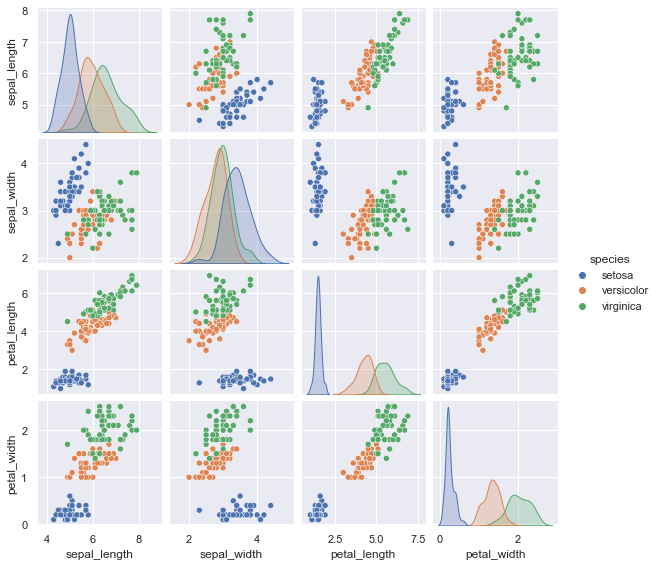

In [122]:
sns.pairplot(hue='species',data=df, size=2)

### This plot illustrates that the human eye is still extremely useful in pattern matching, with one flower linearly separable from the other two. The other two are not linearly separable from each other. It is the Iris-versicolor and the Iris-virginica that share strong similarities, while the Iris-setosa differs.

<AxesSubplot:>

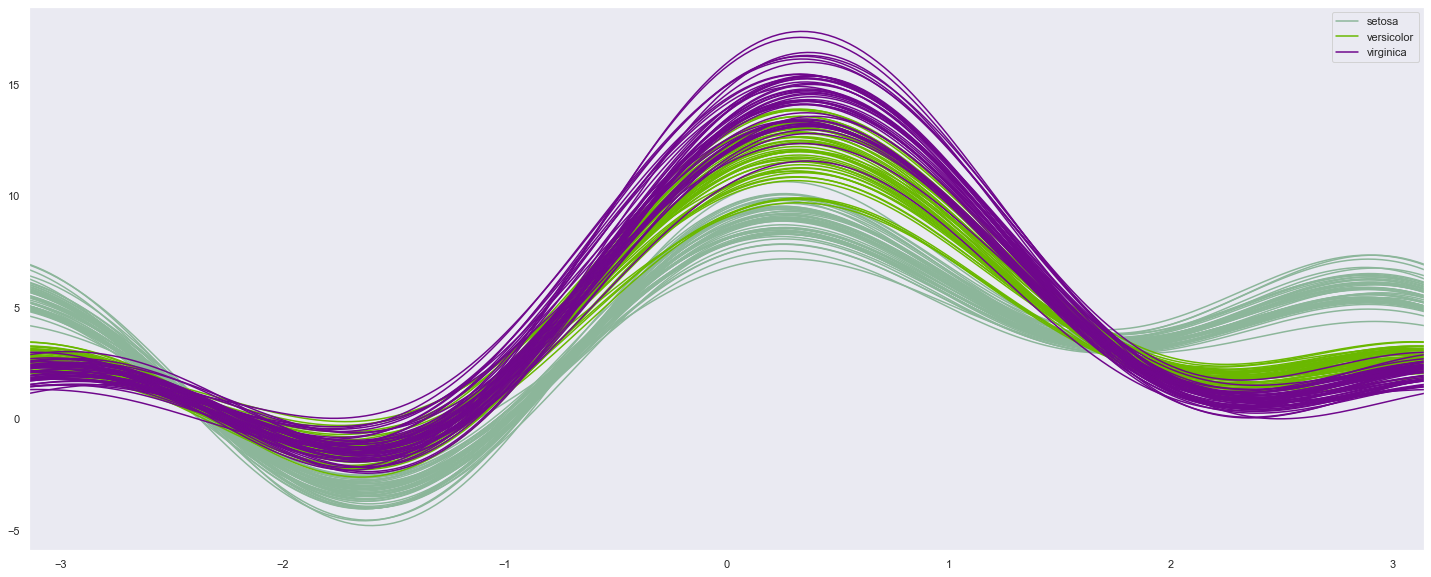

In [109]:
pd.plotting.andrews_curves(df, 'species')

<AxesSubplot:>

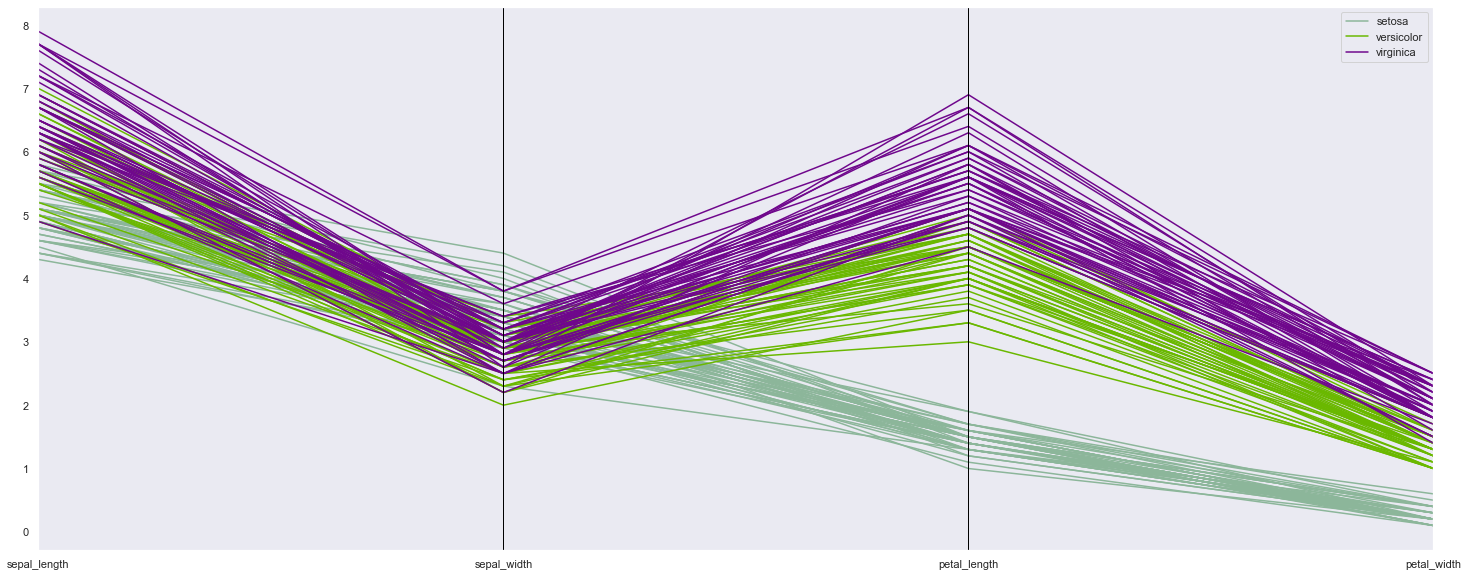

In [110]:
pd.plotting.parallel_coordinates(df,'species')

# **Model Creation**

### It is a Classification Problem. Thus I will be using the Classification Algorithms to build the Model

 - Now when we train any Algorithm, the number of features and their correlation plays in important role. 
 - If there are features and many of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy. 
 - Thus feature selection should be done carefully. 
 - This DataSet has less feature but we will see the Correlation

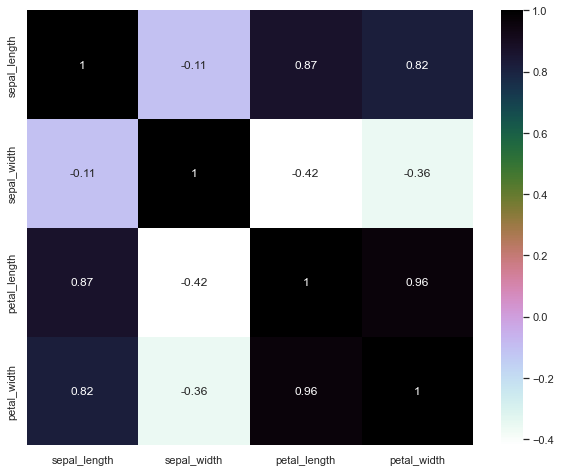

In [111]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

- Sepal_width is not correlating with any of the Features, whereas Petal_length and Petal_width is highly correlating with all of the features

### Performing Test,Train Split

In [112]:
X=df.drop(labels='species', axis=1)
y=df.species

X.shape, y.shape

((150, 4), (150,))

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

### Makikng a PipeLine for Standard Scaler

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline=Pipeline({
    ("scaler", StandardScaler())
})

X_train=pipeline.fit_transform(X_train)


### Model Training

In [115]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=0.25)
model_svm.fit(X_train, y_train)

SVC(C=0.25, kernel='linear')

### Checking the Accuracy

In [116]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_svm,X_train,y_train,cv=10)
print(cv_scores)
print()
print("Accuracy of Your Model is :- \n ",cv_scores.mean())

[0.91666667 1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         0.91666667]

Accuracy of Your Model is :- 
  0.95


### Checking one More Algorithm

In [117]:
from sklearn.ensemble import RandomForestClassifier

rfm=RandomForestClassifier()
rfm.fit(X_train, y_train)


RandomForestClassifier()

In [118]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfm,X_train,y_train,cv=10)
print(cv_scores)
print()
print("Accuracy of Your Model is :- \n ",cv_scores.mean())

[0.91666667 1.         0.91666667 1.         0.66666667 0.83333333
 1.         1.         1.         0.91666667]

Accuracy of Your Model is :- 
  0.9249999999999998


## I will be Choosing SVM as it is giving better Accuracy and now checking on the TestSet

In [119]:
X_test_prepared=pipeline.transform(X_test)


In [123]:
final_model = SVC(kernel='linear', C=0.25)
final_model.fit(X_train, y_train)


SVC(C=0.25, kernel='linear')

In [124]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model,X_test_prepared,y_test,cv=10)
print(cv_scores)
print()
print("Accuracy of Your Model is :- \n ",cv_scores.mean())

[1.         1.         1.         1.         1.         0.66666667
 0.66666667 1.         1.         1.        ]

Accuracy of Your Model is :- 
  0.9333333333333332


## <span style="color:green">  If my NoteBook helped you in any way please give it a UpVote. If I made any mistakes please let me know.

## <span style="color:yellow">Happy Coding :D</span>
